<h1><center>Solving the Lights Out Puzzle Using Grover's Algorithm</center></h1>

<h1><center>BY Mahmoud Nafrawy</center></h1>

## Problem description: 
The Puzzle consists of an NxN grid of bulbs, where each bulb occupied a cell on the grid, and has its own switch, which when pressed switches the state of the bulb between "on <----> off". The grid starts off in an initial state of on-&-off bulbs, and you need to find the sequence of switch presses that would "turn off all the lights", hence the name, "Lights-Out-Puzzle".  

Consider the initial state in the picture below, with yellow meaning the coresponding bulb is on, this is the setup we will have to solve for:

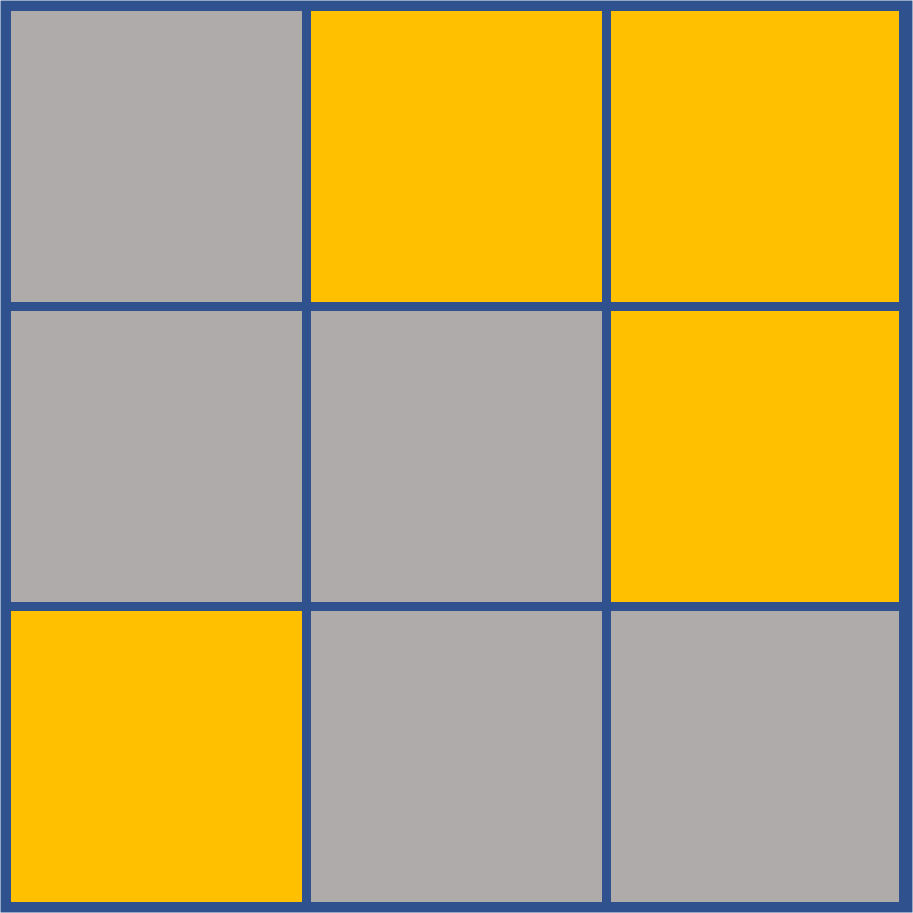

This corresponds to initial state :[0, 1, 1, 0, 0, 1, 1, 0, 0]

In [1]:
lights = [0,1,1,0,0,1,1,0,0] ## this is our variable holding the initial bulb states

On flipping a switch, the corresponding bulb and the ones surrounding it have their states flipped similar to the illustration below:

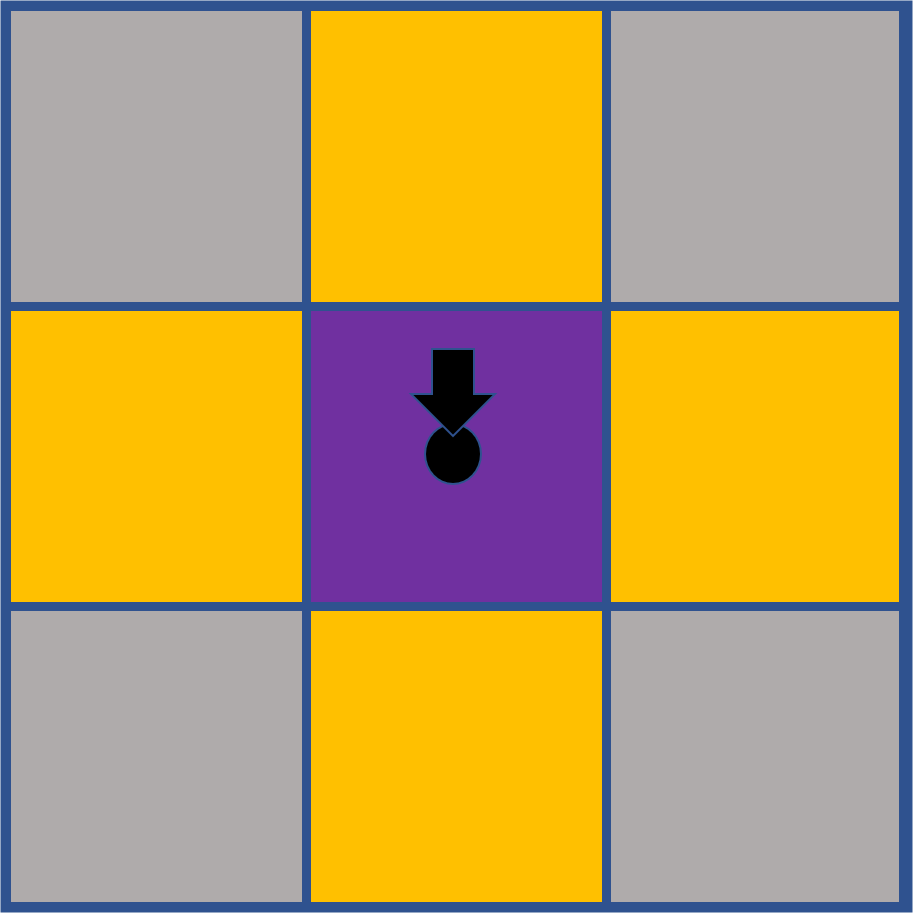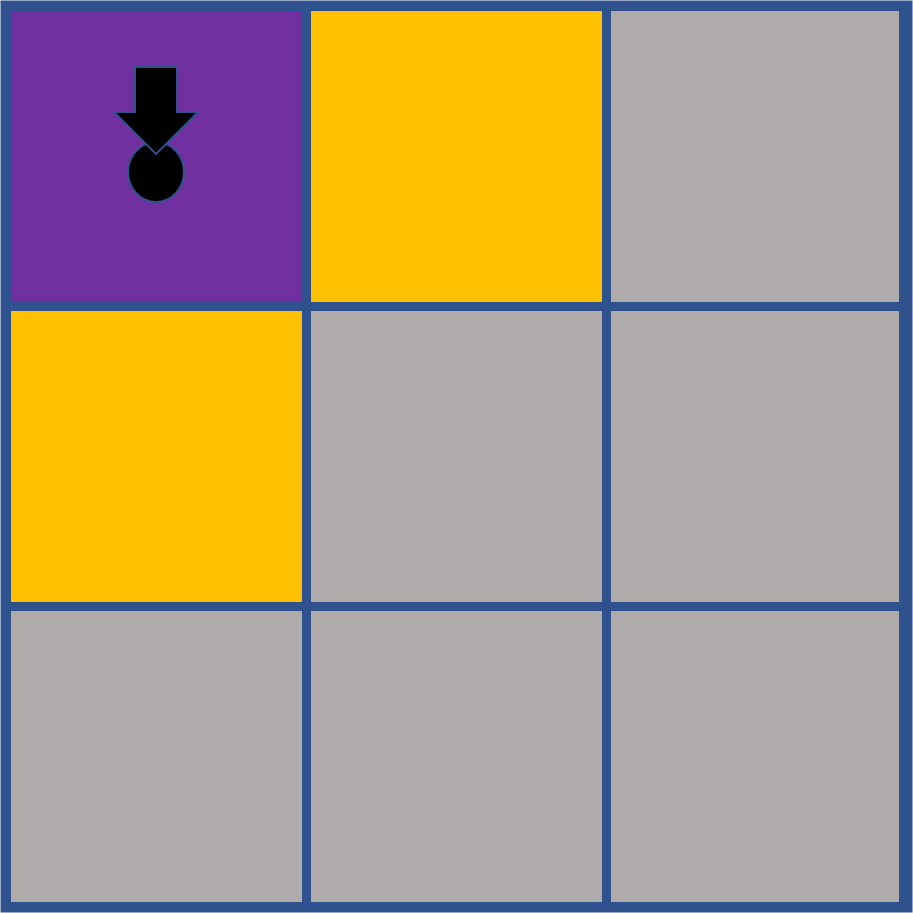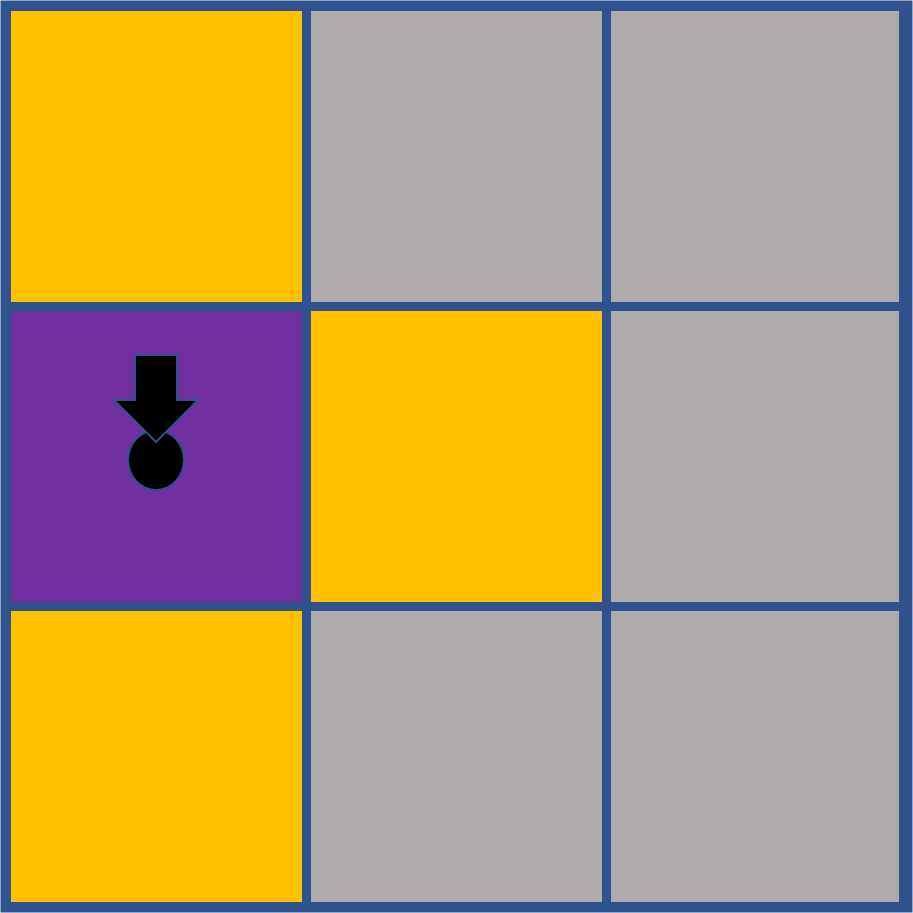

Our goal is to find the sequence of switch flips, ex [000000111], that would turn off all the lights, with a grid looking like the one below:

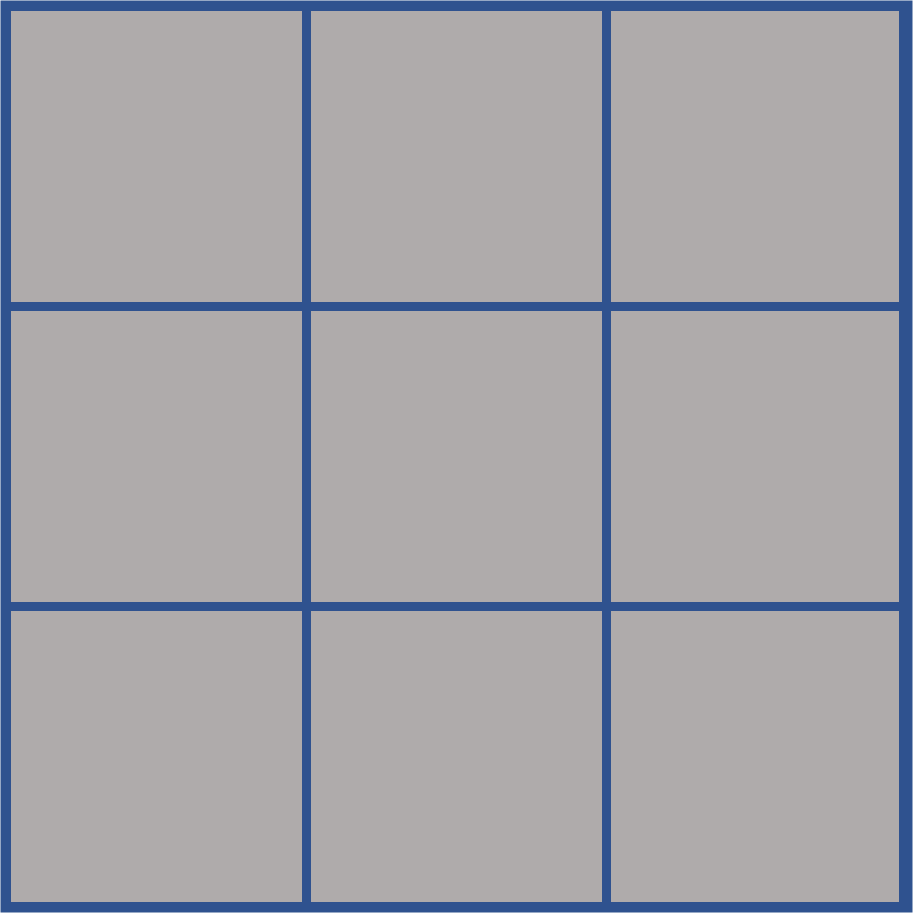

## Steps:

#### A. Register Preparation: we need to setup the quantum and classical registers for the problem, which involves using 3 main quantum-registers and a classical-register.

1. A register to hold the solution space of switch-states, since the solution to the problem is a set of 9 on/off(binary system) switches (we have a 3x3 grid of bulbs), call this register "switch/var".
NB: remember a switch can be on or off (binary, and we can only flip a switch once), we therefore have $2^9$ possible states forming our state-space of possible solutions, a perfect candidate for mapping to a 9-qubit system.
2. A control register which will carry temporary info about the state of the bulbs (bulb-states), and be used to determine if a given switch-state is a solution, call it "bulb/ctrl"
3. An output qubit which will initiate a phase kickback if the control register (representing the bulb-states) reflects that a given switch-state is a solution.
4. A classical register to store the measurements.  

#### B. State initialization for our specific problem:
To initilaize the circuit to map to our specific initial state to the register.

#### C. Construct the problem Oracle:
To construct an oracle that would assign a negative phase to the solution state.  

#### D. Construct the Diffuser
 
#### E. Construct the Grover-Circuit over the appropriate number of iterations

#### F. Run the completed Grover-Circuit & Use the measurement to obtain the solution, which corresponds to the most probable state



## Solution: 

### IMPORTANT:   
#### You need to Place the appropriate code in front of the Question cells, please adjust your code so that it fits this framework, no other solution steps will be accepted, if you understood the first phase it should be very easy to follow this framework no matter how you approach the problem.

### A. Preparing registers before we initiate the states and apply an oracle and a Diffuser:

#### Hint: your register will need 19 Qubits

### Q1: Register preparation :

In [2]:
from qiskit import *
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import plot_histogram



qr= QuantumRegister(19,'q')
circ = QuantumCircuit(qr)

### Iterations:

We can always approximate the number of iterations Grover's algorithm needs to reach a solution given the number of winners and the size of our solution state-space, here we have $2^9$ solutions, from which only one is the winner, so describe how many iterations we will need below:

# Q2: Iterations can be determined by :


It is needed approximately $N^{1/2}$ iterations to find our winner, where N is the input variables. That certain value is deduced form the mean value reflection to amplify our winner probability.

### B. State initialization for our specific problem:

#### Next we need to define a function which
A.  maps the initial bulb-state to the bulb register. for example ... initiate a [0, 1, 1, 0, 0, 1, 1, 0, 0] state, which would correspond to [off, on, on, off, off, on, on, off, off]

B. initializes the $ \left| S \right\rangle $ state (uniform superposition for the Grover circuit) 

C. Initializes the state of the Output Qubit which makes it suitable for phase kickback... you should know which state that is

### Q3: Circuit initialization for the given lights-out setup :


Describe your code for this step:

After initializing the 9 qubits, I will run on lights elements and when i encounter value 1, I will use X gate to flip the corresponding qubit. 

In [3]:
 for i in range(len(lights)):
    if (lights[i]):
        circ.x(qr[9+i])

### C. Construct the problem Oracle:

#### The Oracle consists of 2 parts, 

First, we must define how a switch-state from our solution state-space affects a bulb-state.  
For example [111111110] is a switch-state where all switches have been flipped, except the last one. Since we know what switching a flip does we can translate this sequence of switch flips to an effect on a bulb-state.  
Accordingly, the first part of the oracle runs a given switch-state yielding a final bulb-state.

Second we must define what "light-state" constitutes a Winner. By definition, our Winner switch-state is the one which renders `ALL bulb-qubits off`. Therefore, the second part of the oracle needs to extract that piece of information from the "bulbs" register, so that in case of finding a winner it could initiate a flip in the output register. This flipping of the output register will in turn initiate a phase-kickback, and we get a negative sign infront of our winner, which is what the oracle does, and we're done.


### Part 1 of the Oracle:  

#### Q4: We need to define a function for the first part of the oracle below, which takes the prepared quantum circuit, some switch state, and the given initial bulb-state, and finally acts on the bulb-state accordingly.

#### Hint: you will need a little bit more than 30 gates to achieve this.

    
describe what your code does here for this step:  

I will use XOR-gates to match each switch with the corresponding bulbs it controls and then I will use X-gates to be able to use the Toffoli-gate, between the 10 qubits (our 9 and the output qubit), correctly to measure the result of the 9 qubits and put it on the output qubit. then using X-gates to reverse the X-gates effect before the Toffoli-gate and using the same initial setup of the XOR-gates used at the beguining to retrived the original states of the qubits to make them ready for another measurement.

In [4]:
qr1=QuantumRegister(19,'gg')
circ1=QuantumCircuit(qr1)
for i in range(len(lights)):
    target=[i]
    right=i+1
    left=i-1
    above=i-3
    below=i+3
    if (above<=8 and above>=0):
        target.append(above)

    if (below<=8 and below>=0):
        target.append(below)

    if ((i+1)%3!=0):
        target.append(right)

    if ((i)%3!=0):
        target.append(left)
    
    for j in target:
        circ1.cx(qr1[i],j+9)

circ1.x(qr1[9:18])

circ1.mct(qr1[9:18],qr1[18])

circ1.x(qr1[9:18])

for i in range(len(lights)):
    target=[i]
    right=i+1
    left=i-1
    above=i-3
    below=i+3
    if (above<=8 and above>=0):
        target.append(above)

    if (below<=8 and below>=0):
        target.append(below)

    if ((i+1)%3!=0):
        target.append(right)

    if ((i)%3!=0):
        target.append(left)
    
    for j in target:
        circ1.cx(qr1[i],j+9)
            
Oracle = circ1.to_gate();

### Part 2 of the Oracle, then combining steps C, D & E into a function which constructs the second part of the Oracle, the Diffuser & obtain the completed Grover-Circuit over the appropriate number of iterations:

#### Q5a: Complete the for loop below which runs our predetermined iterations of Grover.
-applies the first part of the oracle (by calling a function)  
-applies the second part of the oracle to check for the winner switch-state (Hint: a known gate can do this)  
-uncomputes (you should know what that is)  
-applies an appropriate diffuser  

#### Q5b: finally measure the output
Measure the switch-states from which we can infer the most probable answer.

NB:  you can use the "qc.reverse_bits()" function on a "qc"-quantum circuit object to reverse the order of the bits to avoid Qiskit's annoying convention.

    
describe what your code does here for these two steps:  

First, I defined the diffuser needed which takes nqubits (9) to act on them, which are basically our light bulbs. Second, added an aditional 9 classical registers needed to measure the switch state to give our winner after the n runs. The number of runs is given by (2^9)^1/2, and taking the nearest integer. Third, calling the new combined circuit and adding to it which bulb is on and which is off, then, adding X-gate then H-gate to our last qubit (which is used to test the value of the bubls after each run) (the last qubit, output, measure the values of the bulbs state using Toffoli-gate on them). Fourth, generating a linear combination of all possible solutions of the switches (first 9 qubits) using H-gate on each qubit. Finally, applying the generated Oracle (on all qubits) and Diffuser(on the first 9 qubits, our switches) to the circuit and measure the first 9 qubits using 9 classical gates and getting the maximum probability solution and reverse it to get what switch should we turn on/off in order to get all the bulbs to close.

In [5]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    return U_s

dif=diffuser(9)
cr = ClassicalRegister(9,'c')
circ=QuantumCircuit(qr,cr)
for i in range(len(lights)):
    if (lights[i]):
        circ.x(qr[9+i])
circ.x(qr[18])
circ.h(qr[18])
circ.h(qr[0:9])
for _ in range(18):
    circ.append(Oracle,qr[0:19])
    circ.append(dif,qr[0:9])
circ.measure(qr[0:9],cr[0:9])

circ.draw()

┌───┐     ┌────────────┐┌────────────┐┌────────────┐┌────────────┐»
 q_0: ┤ H ├─────┤0           ├┤0           ├┤0           ├┤0           ├»
      ├───┤     │            ││            ││            ││            │»
 q_1: ┤ H ├─────┤1           ├┤1           ├┤1           ├┤1           ├»
      ├───┤     │            ││            ││            ││            │»
 q_2: ┤ H ├─────┤2           ├┤2           ├┤2           ├┤2           ├»
      ├───┤     │            ││            ││            ││            │»
 q_3: ┤ H ├─────┤3           ├┤3           ├┤3           ├┤3           ├»
      ├───┤     │            ││            ││            ││            │»
 q_4: ┤ H ├─────┤4           ├┤4 circuit10 ├┤4           ├┤4 circuit10 ├»
      ├───┤     │            ││            ││            ││            │»
 q_5: ┤ H ├─────┤5           ├┤5           ├┤5           ├┤5           ├»
      ├───┤     │            ││            ││            ││            │»
 q_6: ┤ H ├─────┤6           ├┤6           ├┤6           ├┤6           ├»
      ├───┤     │            ││            ││            ││            │»
 q_7: ┤ H ├─────┤7           ├┤7           ├┤7           ├┤7           ├»
      ├───┤     │            ││            ││            ││            │»
 q_8: ┤ H ├─────┤8           ├┤8           ├┤8           ├┤8           ├»
      └───┘     │            │└────────────┘│            │└────────────┘»
 q_9: ──────────┤9  circuit8 ├──────────────┤9  circuit8 ├──────────────»
      ┌───┐     │            │              │            │              »
q_10: ┤ X ├─────┤10          ├──────────────┤10          ├──────────────»
      ├───┤     │            │              │            │              »
q_11: ┤ X ├─────┤11          ├──────────────┤11          ├──────────────»
      └───┘     │            │              │            │              »
q_12: ──────────┤12          ├──────────────┤12          ├──────────────»
                │            │              │            │              »
q_13: ──────────┤13          ├──────────────┤13          ├──────────────»
      ┌───┐     │            │              │            │              »
q_14: ┤ X ├─────┤14          ├──────────────┤14          ├──────────────»
      ├───┤     │            │              │            │              »
q_15: ┤ X ├─────┤15          ├──────────────┤15          ├──────────────»
      └───┘     │            │              │            │              »
q_16: ──────────┤16          ├──────────────┤16          ├──────────────»
                │            │              │            │              »
q_17: ──────────┤17          ├──────────────┤17          ├──────────────»
      ┌───┐┌───┐│            │              │            │              »
q_18: ┤ X ├┤ H ├┤18          ├──────────────┤18          ├──────────────»
      └───┘└───┘└────────────┘              └────────────┘              »
 c: 9/══════════════════════════════════════════════════════════════════»
                                                                        »
«      ┌────────────┐┌────────────┐┌────────────┐┌────────────┐┌────────────┐»
« q_0: ┤0           ├┤0           ├┤0           ├┤0           ├┤0           ├»
«      │            ││            ││            ││            ││            │»
« q_1: ┤1           ├┤1           ├┤1           ├┤1           ├┤1           ├»
«      │            ││            ││            ││            ││            │»
« q_2: ┤2           ├┤2           ├┤2           ├┤2           ├┤2           ├»
«      │            ││            ││            ││            ││            │»
« q_3: ┤3           ├┤3           ├┤3           ├┤3           ├┤3           ├»
«      │            ││            ││            ││            ││            │»
« q_4: ┤4           ├┤4 circuit10 ├┤4           ├┤4 circuit10 ├┤4           ├»
«      │            ││            ││            ││            ││            │»
« q_5: ┤5           ├┤5           ├┤5           ├┤5           ├┤5           ├»
«      │            ││  

### F. Run the Grover-Circuit and use the measurement to obtain the solution:

In [6]:
## Running the completed Grover's circuit:

sim = Aer.get_backend('qasm_simulator')

job = execute(circ, backend=sim, shots=2048)
result = job.result()
count = result.get_counts()

### Q6: Extract the solution form the results:

  
Q6  
describe what your code does here for this final step, how do we extract the solution form the results:  

The max observation output has 9 binary numbers each number represent the switches to open or close to get all the bulbs to be switched off. The 1 value means that we need to turn on the switch of that element. For example, the 3rd 1 means that we go to the 3rd position on the 3x3 box and turn it on. Of course the 0 value means to leave the switch  of that element off.

In [7]:
maxobservation=list(count.keys())[np.argmax(np.array(list(count.values())))]
maxobservation[::-1]

'111001101'

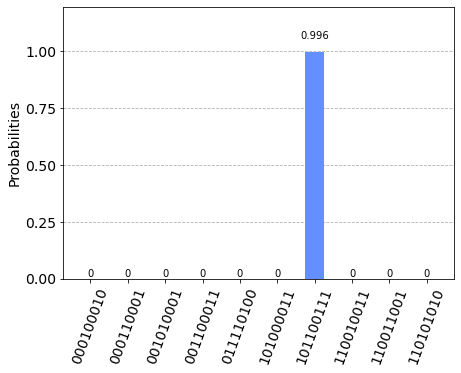

In [8]:
plot_histogram(count)

### Final Remarks: Wrap up your steps, talk briefly about your code and summarize the results and conclusion:  

Firstly, I registered the qubits needed for our calculations, then, created the oracle to get our winner which make all the bubls turned off. after that created the diffuser. Futher, I initialized the needed state of the 3x3 bubls to be solved. Futhermore, used all of that and the oracle and the diffuser gates are applied nearly 22 times and added 9 classical bits for the measurement and saved the results for the highest probability solution. The code gives what the state of each switch should be so as to all bulbs be off and the position of the bulbs on 3x3 box mabs the same on the result 9 binary values with 1 means turn the switch on and 0 measn leave it unchanged. In conclusion, Grover's searching algorithm is used to find the solution to the lights out puzzle with random initial states of the light, futher, the number of itirations differs for different box size as number of itirations needed to maximize the right solution ampilitude equal approximatley $(2^{L*W})^{1/2}$ where L and W are the length and width of the box respectively.

Note: At first I used int(np.sqrt(2^9) = 22) for the number of itirations of applying the oracle and diffuser and got the same result (check it), but found that with only 18 itirations I can get a clearer histogram and higher probability.

<h3><center>.........................................................  END .............................................................</center></h3>